In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
data_A = np.genfromtxt('data/DetectorA.csv', delimiter=',', skip_header=1).T
data_B = np.genfromtxt('data/DetectorB.csv', delimiter=',', skip_header=1).T
data_C = np.genfromtxt('data/DetectorC.csv', delimiter=',', skip_header=1).T
data_Target = np.genfromtxt('data/DetectorTarget.csv', delimiter=',', skip_header=1).T

In [43]:
score_A = data_A[1]
score_B = data_B[1]
score_C = data_C[1]
score_Target = data_Target[1]

In [44]:
energy_A = data_A[2]
energy_B = data_B[2]
energy_C = data_C[2]
energy_Target = data_Target[2]

(1000.0, 3309.63105)

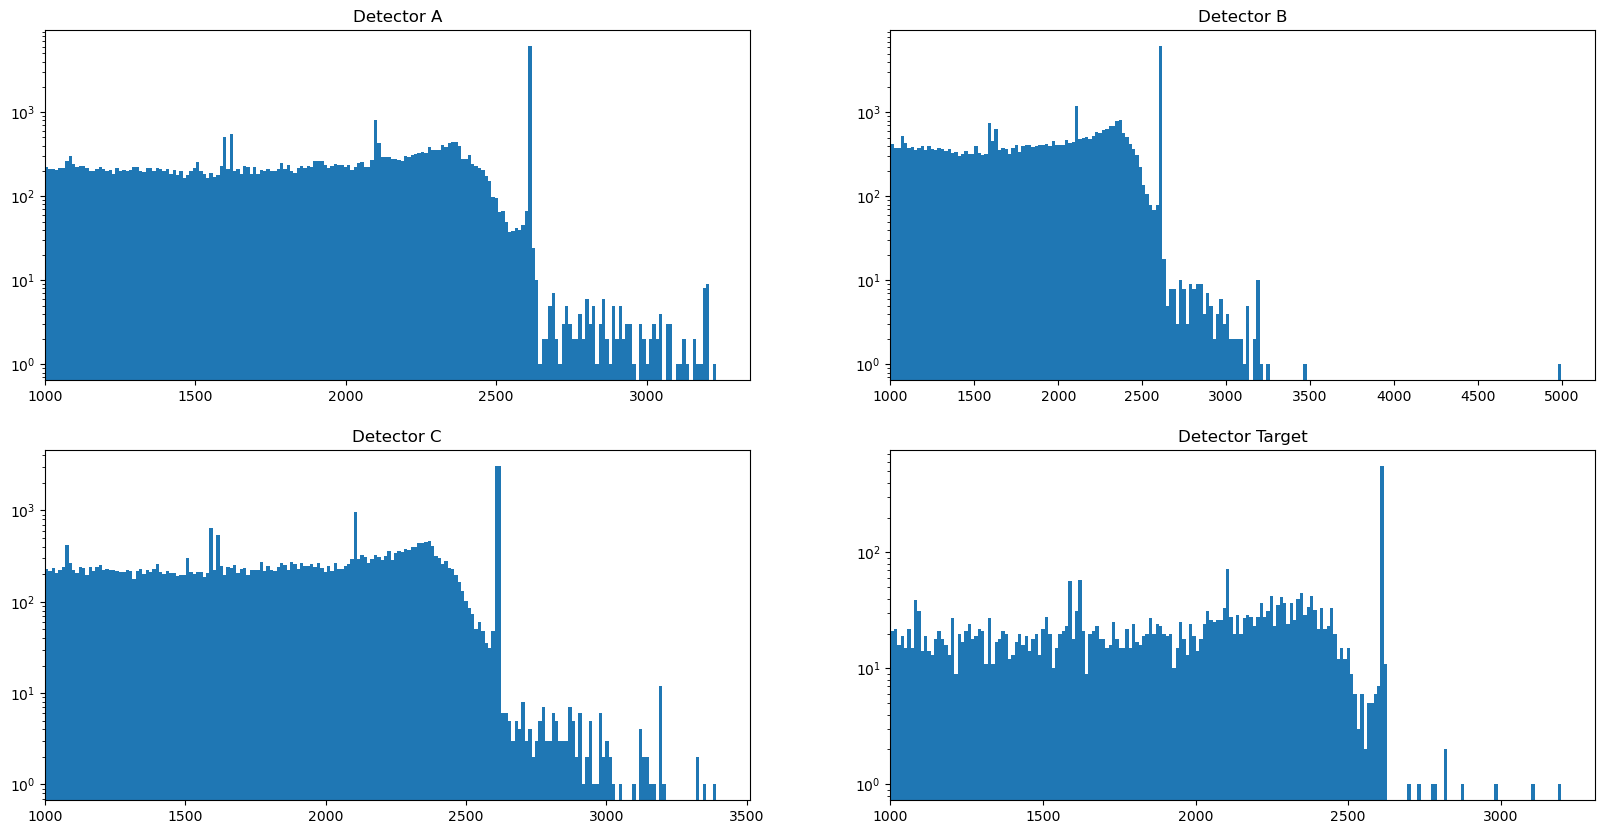

In [60]:
n_bins = 200
hist_A, bins_A = np.histogram(energy_A, bins=n_bins)
hist_B, bins_B = np.histogram(energy_B, bins=n_bins)
hist_C, bins_C = np.histogram(energy_C, bins=n_bins)
hist_Target, bins_Target = np.histogram(energy_Target, bins=n_bins)

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

axes[0, 0].set_title('Detector A')
axes[0, 0].stairs(hist_A, bins_A, label='Detector A', fill=True)
axes[0, 0].set_yscale('log')
axes[0, 0].set_xlim(1000)

axes[0, 1].set_title('Detector B')
axes[0, 1].stairs(hist_B, bins_B, label='Detector B', fill=True)
axes[0, 1].set_yscale('log')
axes[0, 1].set_xlim(1000)

axes[1, 0].set_title('Detector C')
axes[1, 0].stairs(hist_C, bins_C, label='Detector C', fill=True)
axes[1, 0].set_yscale('log')
axes[1, 0].set_xlim(1000)

axes[1, 1].set_title('Detector Target')
axes[1, 1].stairs(hist_Target, bins_Target, label='Detector Target', fill=True)
axes[1, 1].set_yscale('log')
axes[1, 1].set_xlim(1000)


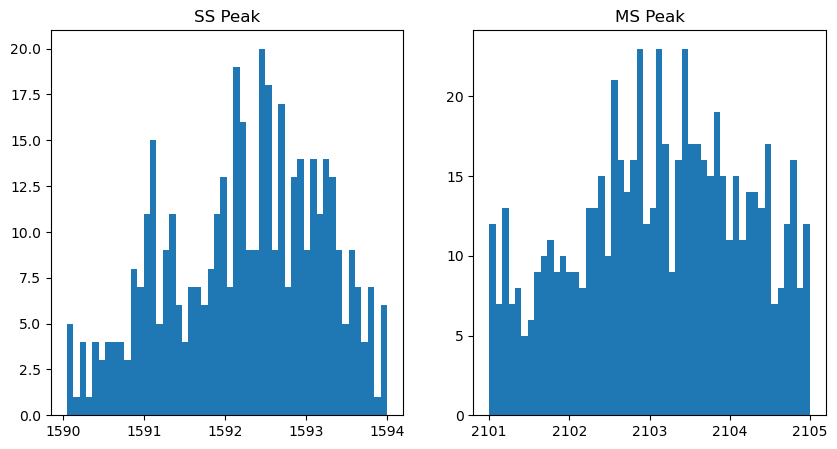

In [81]:
ss = energy_A[(energy_A > 1590) & (energy_A < 1594)]
ms = energy_B[(energy_B > 2101) & (energy_B < 2105)]

n_bins_peaks = 50

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].set_title('SS Peak')
_ = axes[0].hist(ss, bins=n_bins_peaks)

axes[1].set_title('MS Peak')
_ = axes[1].hist(ms, bins=n_bins_peaks)


In [113]:
ss_score = score_A[(energy_A > 1590) & (energy_A < 1594)]
ms_score = score_B[(energy_B > 2101) & (energy_B < 2105)]

Ns = ss.size
Nb = ms.size

def metrics(threshold):
    Ntp = np.sum(ss_score > threshold)
    Nfp = np.sum(ms_score > threshold)
    return Ntp / Ns, Nfp / Nb

def roc(thresholds):
    return np.array([metrics(t) for t in thresholds])

def plot_roc(threshold):
    roc_curve = roc(np.linspace(0, 1, 200))
    selected = metrics(threshold)
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.plot(roc_curve[:, 1], roc_curve[:, 0], label='ROC curve')
    ax.plot(selected[1], selected[0], 'ro', label='Selected threshold')
    ax.set_xlabel('False positive rate')
    ax.set_ylabel('True positive rate')
    ax.set_title('ROC curve')
    print(f'True positive rate: {selected[0]:.2f}')
    print(f'False positive rate: {selected[1]:.2f}')
    plt.legend()

In [ ]:
import ipywidgets as widgets
interact(plot_roc, 
         threshold=widgets.FloatSlider(min=0, max=1, step=0.005, value=0.5, layout=Layout(width='50%')))

interactive(children=(FloatSlider(value=0.5, description='threshold', layout=Layout(width='50%'), max=1.0, ste…

<function __main__.plot_roc(threshold)>